# 反復判別分析法

まず、判別分析法で２階調化のしきい値を求め、そのしきい値以下の画素以外の画素に再び判別分析法を適用してしきい値を求める。

例えば星空画像に暗い樹木や建物が写り込んでいる場合、ヒストグラムのもっとも暗い位側の山は樹木や建物であるので、２度めの判別分析ではそれらを除外した空の部分だけのデータを分離するようなしきい値、つまり星の明るさは白、宇宙の闇は黒、という２階調化が期待できる。

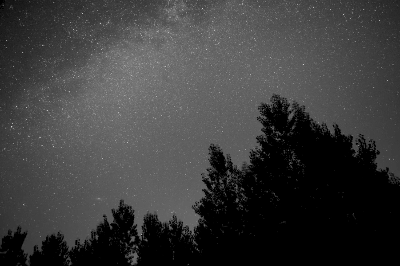

処理対象画像


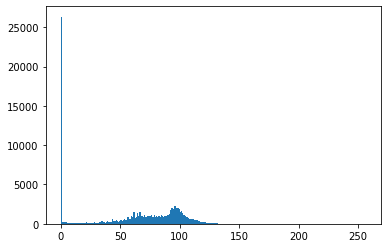

ヒストグラム


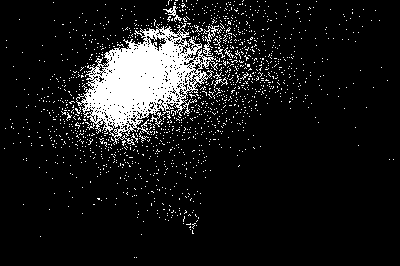

反復判別分析法の結果　　しきい値103.0



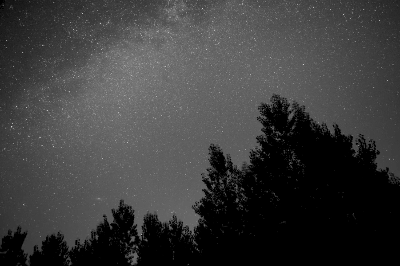

処理対象画像


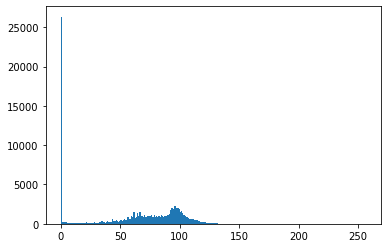

ヒストグラム


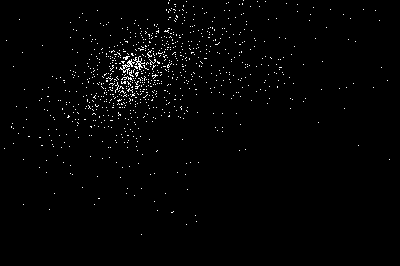

反復判別分析法の結果　　しきい値120.0



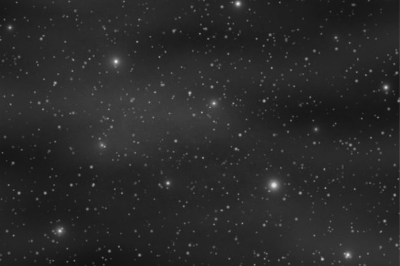

処理対象画像


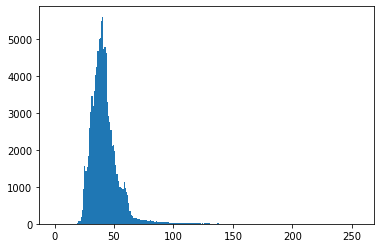

ヒストグラム


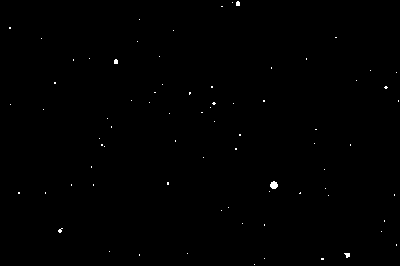

反復判別分析法の結果　　しきい値124.0



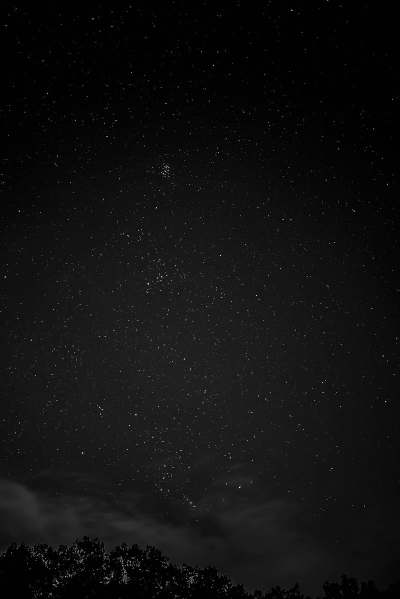

処理対象画像


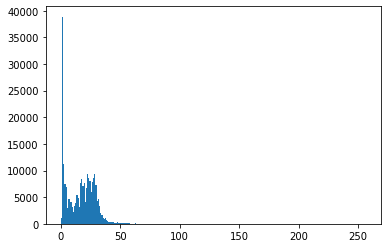

ヒストグラム


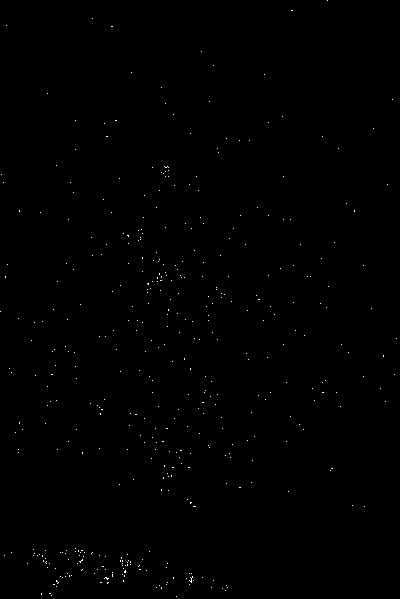

反復判別分析法の結果　　しきい値81.0



In [178]:
import urllib.request
import cv2
from google.colab.patches import cv2_imshow
from matplotlib import pyplot as plt
from matplotlib import pylab
from google.colab import widgets
import warnings
import matplotlib
warnings.filterwarnings('ignore', category=matplotlib.MatplotlibDeprecationWarning)

WIDTH=400

url1 = "https://user-images.githubusercontent.com/5820803/111906119-62a87e80-8a92-11eb-8550-c704aff0cf26.png" # 画像URL
url2 = "https://www.happy-bears.com/kajily/wp-content/uploads/2020/05/3407618_s-630x420.jpg"
url3 = "https://upload.wikimedia.org/wikipedia/commons/thumb/9/96/%E6%98%9F%E7%A9%BA.jpg/800px-%E6%98%9F%E7%A9%BA.jpg"

# ignlevel 以下の画素を判別分析の対象から除外してしきい値を決定してみる。
def maskedOtus(img,ignlevel):
  data = img[(img>ignlevel)]
  maxd = -1
  maxbunri = 0
  dnum = len(data)
  for i in range(254):
    w,b = 0,0
    nw = (data>i).sum()
    if nw == 0 or nw == dnum:
      continue
    mw = data[data>i].sum()/nw
    mb = data[data<=i].sum()/(dnum-nw)
    bunri = nw*(dnum-nw)*(mb-mw)*(mb-mw)
    if bunri > maxbunri:
      maxbunri = bunri
      maxd = i  
  return maxd

def go1(url,repeat=2):
    img_path, header = urllib.request.urlretrieve(url)
    img = cv2.imread(img_path,0) #  画像の読み込み
    width = WIDTH
    height = img.shape[0]*WIDTH//img.shape[1]
    img = cv2.resize(img,(width,height))
    cv2_imshow(img) #
    print("処理対象画像")
    hist = cv2.calcHist([img],[0],None,[256],[0,256])
    plt.hist(img.ravel(),256,[0,256]); plt.show()
    print("ヒストグラム")
    ret,_ = cv2.threshold(img,0,255,cv2.THRESH_OTSU)
    for i in range(repeat):
      ret = maskedOtus(img,ret)
    ret,bimg = cv2.threshold(img,maskedOtus(img,ret),255,cv2.THRESH_BINARY)
    cv2_imshow(bimg) #
    print("反復判別分析法の結果　　しきい値{}\n".format(ret))

go1(url1,1)
go1(url1,2)
go1(url2,1)
go1(url3,1);